**Packeges Imports**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


**Load CSV DATA**

In [52]:
dataFrame = pd.read_csv('taxi_trip_pricing.csv')

**Load Columns**

In [53]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Base_Fare
Per_Km_Rate
Per_Minute_Rate
Trip_Duration_Minutes
Trip_Price


**Droping unnecessary Columns**

In [54]:
dataFrame.drop(['Base_Fare','Per_Km_Rate','Per_Minute_Rate'] , axis = 1 , inplace = True)

In [55]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Trip_Duration_Minutes
Trip_Price


In [56]:
dataFrame.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,NaN,75.5657


**Encodin Ordinal Data**

In [57]:
Traffic_Conditions_mapper = {"Low": 0 , "Medium" : 1 , "High" : 2}
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)


Time_of_Day_mapper = {"Morning": 0 , "Afternoon" : 1 , "Evening" : 2 , "Night" : 3} 
dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)

Day_of_Week_mapper = {"Weekday": 0 , "Weekend" : 1} 
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].replace(Day_of_Week_mapper) 

Weather_mapper = {"Clear": 0 , "Rain" : 1 , "Snow" : 2} 
dataFrame['Weather'] = dataFrame['Weather'].replace(Weather_mapper) 
dataFrame.head(10)





C:\Users\mahdi\AppData\Local\Temp\ipykernel_18540\989743489.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_18540\989743489.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_18540\989743489.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated an

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,0.0,0.0,3.0,0.0,0.0,53.82,36.2624
1,47.59,1.0,0.0,1.0,2.0,0.0,40.57,NaN
2,36.87,2.0,1.0,1.0,2.0,0.0,37.27,52.9032
3,30.33,2.0,0.0,4.0,0.0,NaN,116.81,36.4698
4,NaN,2.0,0.0,3.0,2.0,0.0,22.64,15.6180
5,8.64,1.0,1.0,2.0,1.0,0.0,89.33,60.2028
6,3.85,1.0,0.0,4.0,2.0,1.0,5.05,11.2645
7,43.44,2.0,1.0,3.0,NaN,0.0,NaN,101.1216
8,30.45,0.0,0.0,3.0,2.0,0.0,110.33,NaN
9,35.70,1.0,0.0,2.0,0.0,1.0,NaN,75.5657


**Num of Null Values**

In [58]:
dataFrame.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

**Filling Null Data**

In [59]:
dataFrame['Trip_Distance_km'] = dataFrame['Trip_Distance_km'].fillna(dataFrame['Trip_Distance_km'].mean())
dataFrame['Trip_Duration_Minutes'] = dataFrame['Trip_Duration_Minutes'].fillna(dataFrame['Trip_Duration_Minutes'].mean())
dataFrame['Trip_Price'] = dataFrame['Trip_Price'].fillna(dataFrame['Trip_Price'].mean())
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)
dataFrame['Passenger_Count'] = dataFrame['Passenger_Count'].apply(
    lambda x: np.random.choice([1, 2, 3, 4]) if np.isnan(x) else x
)

dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].apply(
    lambda x: np.random.choice([0, 1, 2, 3]) if np.isnan(x) else x
)
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].apply(
    lambda x: np.random.choice([0, 1]) if np.isnan(x) else x
)
dataFrame['Weather'] = dataFrame['Weather'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)



In [60]:
dataFrame.isnull().sum() 

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [61]:
dataFrame.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.350000,0.0,0.0,3.0,0.0,0.0,53.820000,36.262400
1,47.590000,1.0,0.0,1.0,2.0,0.0,40.570000,56.874773
2,36.870000,2.0,1.0,1.0,2.0,0.0,37.270000,52.903200
3,30.330000,2.0,0.0,4.0,0.0,0.0,116.810000,36.469800
4,27.070547,2.0,0.0,3.0,2.0,0.0,22.640000,15.618000
5,8.640000,1.0,1.0,2.0,1.0,0.0,89.330000,60.202800
6,3.850000,1.0,0.0,4.0,2.0,1.0,5.050000,11.264500
7,43.440000,2.0,1.0,3.0,2.0,0.0,62.118116,101.121600
8,30.450000,0.0,0.0,3.0,2.0,0.0,110.330000,56.874773
9,35.700000,1.0,0.0,2.0,0.0,1.0,62.118116,75.565700


**Ploting The Columns Data**

<Axes: >

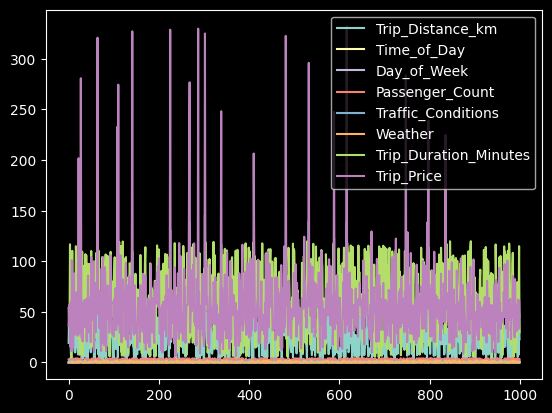

In [62]:
dataFrame.plot()

**Correlation**

In [63]:
corr_matrix = dataFrame.corr()      
corr_matrix["Trip_Price"].sort_values(ascending=False)

Trip_Price               1.000000
Trip_Distance_km         0.829685
Trip_Duration_Minutes    0.215144
Traffic_Conditions       0.053710
Weather                  0.027951
Time_of_Day              0.000767
Passenger_Count         -0.023793
Day_of_Week             -0.034191
Name: Trip_Price, dtype: float64

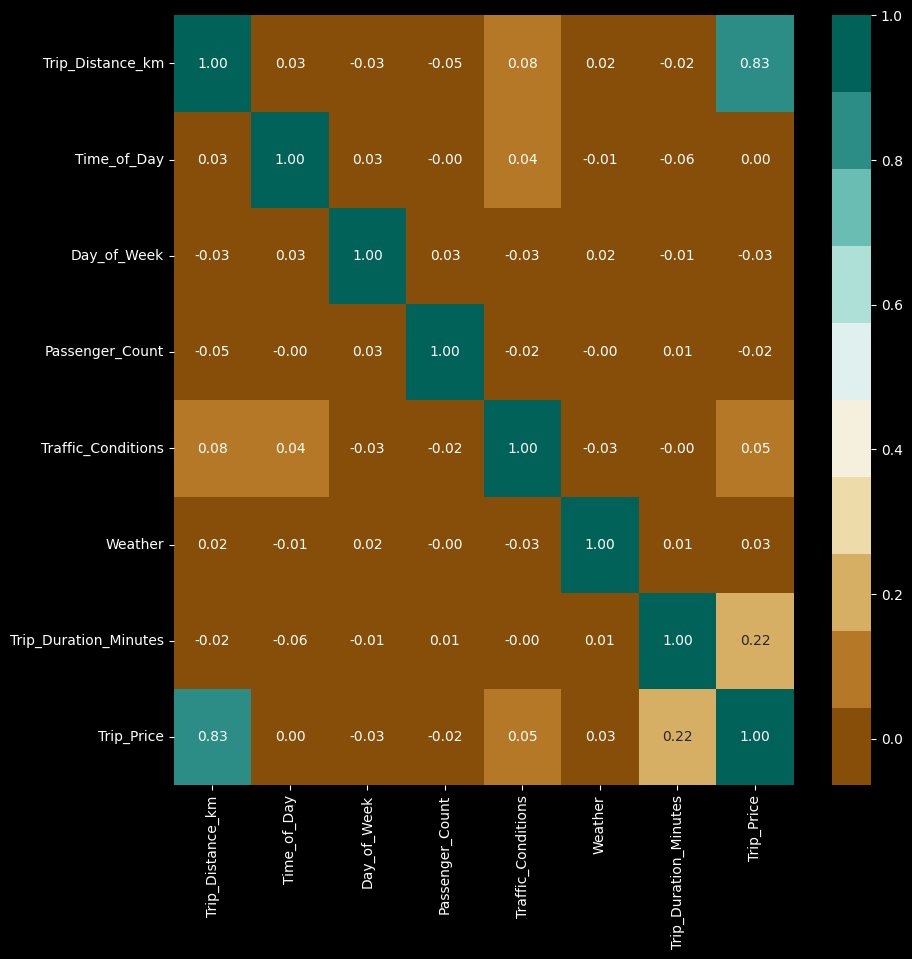

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

**Value Counting**

In [65]:
dataFrame['Traffic_Conditions'].value_counts()


Traffic_Conditions
0.0    414
1.0    391
2.0    195
Name: count, dtype: int64

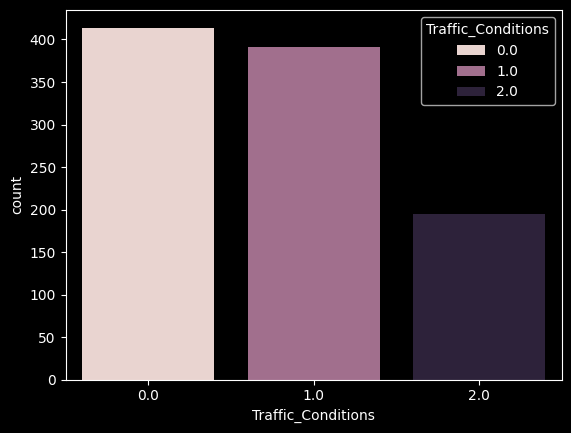

In [66]:
sns.countplot(x= 'Traffic_Conditions',hue='Traffic_Conditions', data=dataFrame, )
plt.show()

In [67]:
dataFrame['Passenger_Count'].value_counts()

Passenger_Count
3.0    263
2.0    255
1.0    246
4.0    236
Name: count, dtype: int64

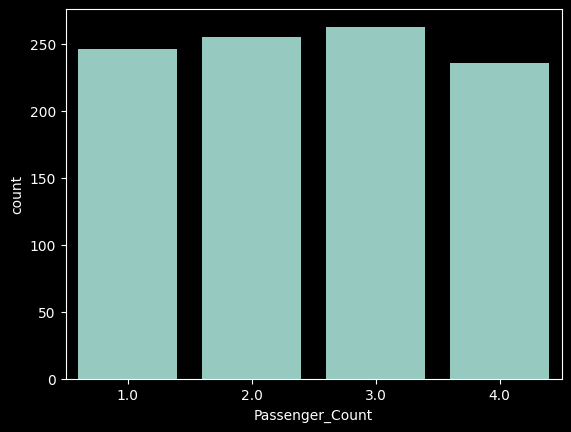

In [68]:
sns.countplot(x= 'Passenger_Count', data=dataFrame, )
plt.show()

In [69]:
dataFrame['Time_of_Day'].value_counts()

Time_of_Day
1.0    382
0.0    289
2.0    223
3.0    106
Name: count, dtype: int64

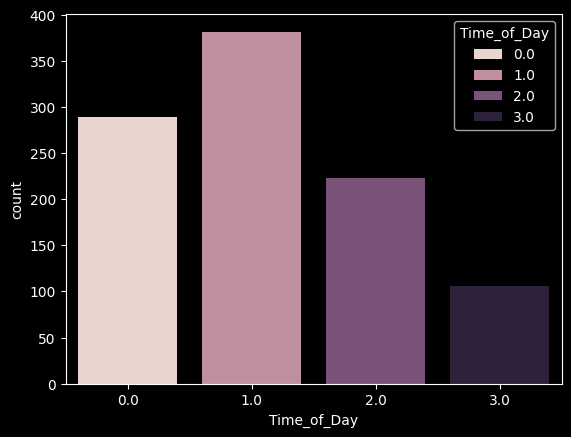

In [70]:
sns.countplot(x= 'Time_of_Day',hue='Time_of_Day', data=dataFrame,)
plt.show()

In [71]:
dataFrame['Weather'].value_counts()

Weather
0.0    680
1.0    252
2.0     68
Name: count, dtype: int64

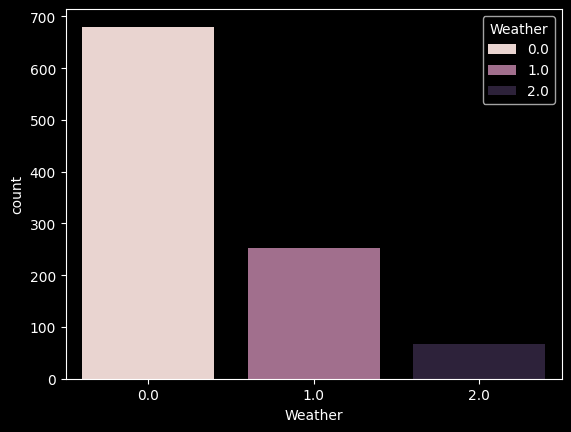

In [72]:
sns.countplot(x= 'Weather',hue='Weather', data=dataFrame,)
plt.show()

In [73]:
dataFrame['Day_of_Week'].value_counts()

Day_of_Week
0.0    684
1.0    316
Name: count, dtype: int64

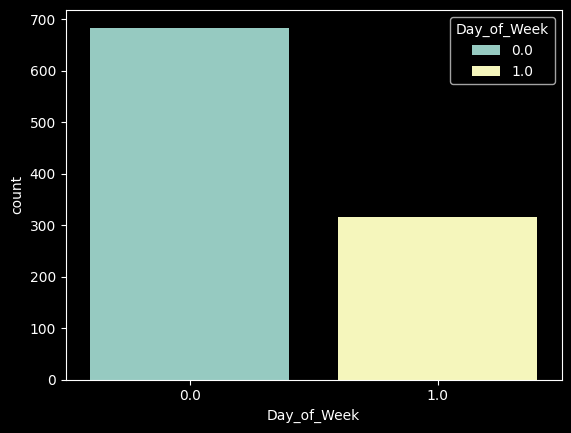

In [74]:
sns.countplot(x= 'Day_of_Week',hue='Day_of_Week', data=dataFrame)
plt.show()

In [75]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   float64
 2   Day_of_Week            1000 non-null   float64
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   float64
 5   Weather                1000 non-null   float64
 6   Trip_Duration_Minutes  1000 non-null   float64
 7   Trip_Price             1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


**Choosing the Features and The Target Value**

In [76]:
features = dataFrame.iloc[:,:-1]
dependentVariable = dataFrame.iloc[:,-1]

**Scaling the Data**

In [77]:
standardScalar = StandardScaler()
features = standardScalar.fit_transform(features)

In [78]:
featuresTrain, featuresTest, dependentVariableTrain, dependentVariableTest = train_test_split(features, dependentVariable , test_size=0.2, random_state=200)

In [79]:
featuresTrain

array([[ 7.25563435e-01,  8.92940106e-01,  1.47124334e+00, ...,
         2.92379951e-01,  1.00145560e+00, -4.89664262e-01],
       [ 5.13004537e+00, -1.52657208e-01,  1.47124334e+00, ...,
        -1.04268832e+00,  1.00145560e+00, -1.04770747e+00],
       [ 1.10511954e+00, -1.19825452e+00, -6.79697215e-01, ...,
        -1.04268832e+00, -6.34909763e-01,  2.26838413e-16],
       ...,
       [-8.85487221e-01, -1.52657208e-01,  1.47124334e+00, ...,
         2.92379951e-01, -6.34909763e-01,  1.28375107e+00],
       [-6.44654745e-01, -1.52657208e-01, -6.79697215e-01, ...,
         2.92379951e-01, -6.34909763e-01,  1.79646125e+00],
       [-1.29856391e+00, -1.19825452e+00, -6.79697215e-01, ...,
        -1.04268832e+00,  2.63782097e+00,  1.65950442e+00]])

In [80]:
featuresTest

array([[-0.30738614,  0.89294011,  1.47124334, ...,  1.62744822,
        -0.63490976, -0.81784985],
       [-0.10007424, -1.19825452,  1.47124334, ...,  0.29237995,
         1.0014556 , -0.15605148],
       [-0.39196114,  0.89294011, -0.67969722, ..., -1.04268832,
        -0.63490976,  0.70974553],
       ...,
       [-0.26045733, -1.19825452, -0.67969722, ...,  1.62744822,
        -0.63490976,  0.30079053],
       [ 0.27896617,  0.89294011, -0.67969722, ..., -1.04268832,
        -0.63490976, -1.36695415],
       [-0.47086343, -1.19825452, -0.67969722, ...,  1.62744822,
        -0.63490976,  0.75444007]])

In [81]:
dependentVariableTrain



989     82.442000
835    224.914663
678     50.731200
177     56.874773
410    206.508652
          ...    
810    109.430400
836     65.947900
784     45.431200
617     37.390000
794     52.779600
Name: Trip_Price, Length: 800, dtype: float64

In [82]:
dependentVariableTest

674    30.401500
233    53.279200
739    40.566500
865    59.742100
523    84.155800
         ...    
931    63.777700
871    56.874773
397    56.874773
355    41.656200
593    58.086100
Name: Trip_Price, Length: 200, dtype: float64

**Alogrithm Used :**

In [83]:
model = LinearRegression()
model.fit(featuresTrain, dependentVariableTrain)
predections = model.predict(featuresTest)

**The Accuracy**

In [84]:
rSquaredScore = r2_score(dependentVariableTest, predections)
print("The accuracy is {}%".format(round(rSquaredScore, 2) * 100))



The accuracy is 79.0%


**Results**

In [85]:
results = pd.DataFrame({
    "Actual": dependentVariableTest,
    "Predicted": predections
})
print(results.head(20))

         Actual   Predicted
674   30.401500   39.034176
233   53.279200   54.657672
739   40.566500   50.165760
865   59.742100   60.856993
523   84.155800   75.053243
726   28.723500   23.470210
473   61.094000   72.612243
501   47.996000   57.671319
570   61.228700   68.598353
346   86.897700   80.032160
221   63.953400   65.701256
207   56.874773   68.702345
256   92.683200   80.926762
588  247.598318  201.115350
74    36.438800   82.421841
404   26.117600   59.639825
632   56.874773   54.000588
294   33.749100   21.118994
659   65.195000   55.935318
136   75.220400   64.208157


**Ploting Actul vs Predections Data**

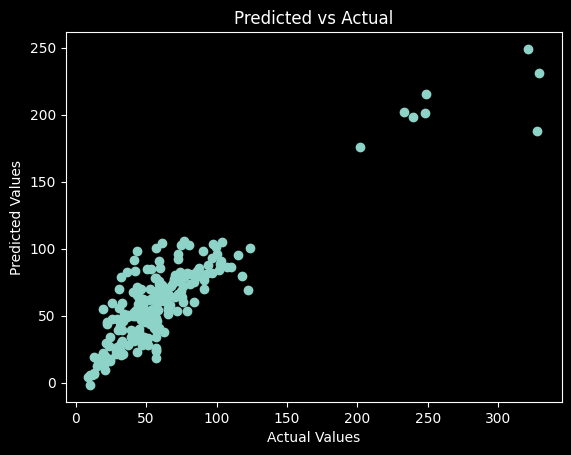

In [86]:
import matplotlib.pyplot as plt

plt.scatter(dependentVariableTest, predections, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

**A User Input Code**

In [87]:
while True:
    try:
        trip_distance = float(input("Enter the Trip Distance (in km): "))
        if trip_distance <= 0:
            raise ValueError("Distance should be a positive number.")
        break  

    except ValueError as e:
        print(f"Error: {e}. Please enter a valid number for trip distance.")

while True:
    try:
        time = input("Enter the Time of Day ([M]orning , [A]fternoon , [E]vening , [N]ight): ").lower()
        global time_of_day
        match time:
            case "m":
                time_of_day = 0
            case "a":
                time_of_day = 1
            case "e":
                time_of_day = 2
            case "n":
                time_of_day = 3
            case _:
                raise ValueError("Invalid input for time of day. Please enter a valid option.")
        break  
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid time of day.")

while True:
    try:
        day = input("Enter the Day of Week (Week[d]ay , Week[e]nd): ").lower()
        global day_of_week
        match day:
            case "d":
                day_of_week = 0
            case "e":
                day_of_week = 1
            case _:
                raise ValueError("Invalid input for day of week. Please enter a valid option.")
        break  
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid day of the week.")

while True:
    try:
        passenger_count = int(input("Enter the Passenger Count (1-4): ")) - 1
        if passenger_count not in range(0, 4):  
            raise ValueError("Passenger count should be between 1 and 4.")
        break  
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid passenger count.")

while True:
    try:
        traffic = input("Enter the Traffic Conditions ([L]ow , [M]edium , [H]igh): ").lower()
        global traffic_conditions
        match traffic:
            case "l":
                traffic_conditions = 0
            case "m":
                traffic_conditions = 1
            case "h":
                traffic_conditions = 2
            case _:
                raise ValueError("Invalid input for traffic conditions. Please enter a valid option.")
        break  
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid traffic condition.")

while True:
    try:
        weather_condition = input("Enter the Weather condition ([C]lear , [R]ain , [S]now): ").lower()
        global weather
        match weather_condition:
            case "c":
                weather = 0
            case "r":
                weather = 1
            case "s":
                weather = 2
            case _:
                raise ValueError("Invalid input for weather condition. Please enter a valid option.")
        break  
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid weather condition.")

while True:
    try:
        trip_duration = float(input("Enter the Trip Duration (could be a float): "))
        if trip_duration <= 0:
            raise ValueError("Duration should be a positive number.")
        break  
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid trip duration.")


user_input = [[trip_distance, time_of_day, day_of_week, passenger_count, traffic_conditions, weather, trip_duration]]
user_input_scaled = standardScalar.transform(user_input)
prediction = model.predict(user_input_scaled)
print(f"The predicted Trip Price is: {prediction[0]}")


Error: could not convert string to float: 'jjh'. Please enter a valid number for trip distance.
Error: could not convert string to float: 'mnn'. Please enter a valid number for trip distance.
Error: could not convert string to float: 'mnmnmn'. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: Distance should be a positive number.. Please enter a valid number for trip distance.
Error: could not convert string to float: ''. Please enter

C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
